In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os
import Transposer

import Binary_reader

from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Read in the Datasets

In [72]:

folder_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/6/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)


test_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/6/Test/"
iso_test, iso_test_original = Binary_reader.get_pandas_dataFrame(test_path)


complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.215409+2.766321j,1.186069+2.754156j,1.158161+2.744273j,1.134166+2.738373j,1.116569+2.738155j,1.106628+2.743836j,1.102874+2.753804j,1.103694+2.767020j,1.107479+2.782448j,1.112615+2.799049j,...,-1.511481+3.495061j,-1.499791+3.516908j,-1.499161+3.539608j,-1.508492+3.565354j,-1.522183+3.591754j,-1.534633+3.616414j,-1.540241+3.636940j,-1.533406+3.650940j,-1.512975+3.657552j,0
1,1.262803+2.772492j,1.232981+2.760217j,1.204227+2.750190j,1.178911+2.744361j,1.155970+2.744691j,1.137300+2.750315j,1.130065+2.759125j,1.129185+2.770673j,1.131862+2.784147j,1.137059+2.797892j,...,-1.465360+3.483270j,-1.455674+3.507387j,-1.458114+3.529789j,-1.466437+3.552451j,-1.477976+3.576162j,-1.487407+3.598123j,-1.486838+3.615508j,-1.467093+3.625029j,-1.440289+3.628769j,0
2,1.311866+2.777094j,1.283921+2.765768j,1.255450+2.756542j,1.228176+2.752357j,1.198960+2.753458j,1.172950+2.758041j,1.157452+2.766260j,1.153438+2.776318j,1.155591+2.787051j,1.162588+2.797173j,...,-1.422600+3.471328j,-1.420042+3.497081j,-1.423499+3.522270j,-1.430702+3.541486j,-1.438776+3.561068j,-1.440931+3.578859j,-1.424934+3.590349j,-1.395614+3.594739j,-1.361547+3.595804j,0
3,1.356820+2.779256j,1.333368+2.770294j,1.306877+2.763334j,1.276667+2.761438j,1.244877+2.762587j,1.215839+2.765929j,1.194195+2.771483j,1.185491+2.779621j,1.186636+2.787191j,1.191176+2.798910j,...,-1.385131+3.463696j,-1.386270+3.487601j,-1.388860+3.512052j,-1.390303+3.532400j,-1.391387+3.546327j,-1.381295+3.557737j,-1.354944+3.561994j,-1.320463+3.562444j,-1.282264+3.561204j,0
4,1.399102+2.780598j,1.379009+2.773580j,1.353820+2.769095j,1.323584+2.767227j,1.292149+2.767618j,1.263363+2.769910j,1.241076+2.773744j,1.229136+2.778764j,1.226576+2.785928j,1.228879+2.795478j,...,-1.337449+3.463140j,-1.338551+3.482789j,-1.340067+3.503235j,-1.338481+3.520818j,-1.330279+3.531875j,-1.311210+3.536034j,-1.281691+3.536238j,-1.245204+3.533805j,-1.205233+3.530055j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,-2.611432+2.065119j,-2.571430+2.017389j,-2.527291+1.976823j,-2.474642+1.955693j,-2.417118+1.953466j,-2.355767+1.964180j,-2.290738+1.989664j,-2.218628+2.026838j,-2.139703+2.070227j,-2.053335+2.112793j,...,2.380757-3.341258j,2.301425-3.418298j,2.230994-3.486389j,2.171481-3.543020j,2.123460-3.590744j,2.081494-3.635501j,2.040783-3.684684j,2.006018-3.734370j,1.974271-3.782342j,1
4854,-2.643848+2.052083j,-2.599840+2.016697j,-2.549594+1.989061j,-2.493337+1.979639j,-2.432570+1.981293j,-2.367371+1.991639j,-2.298225+2.011159j,-2.224511+2.043077j,-2.142522+2.078672j,-2.054276+2.117723j,...,2.380496-3.332270j,2.302894-3.407527j,2.232058-3.477679j,2.168448-3.541793j,2.115048-3.596350j,2.067523-3.650084j,2.026661-3.705276j,1.992637-3.758779j,1.962243-3.810163j,1
4855,-2.671688+2.045516j,-2.623860+2.019813j,-2.569562+2.005881j,-2.510219+2.001255j,-2.446069+2.005144j,-2.377349+2.016757j,-2.304296+2.035305j,-2.227148+2.059997j,-2.144252+2.090498j,-2.054826+2.127094j,...,2.381727-3.324976j,2.304000-3.400025j,2.232553-3.470843j,2.167133-3.537736j,2.107483-3.601009j,2.056392-3.661798j,2.014884-3.720867j,1.980052-3.777971j,1.948989-3.832863j,1
4856,-2.698661+2.040484j,-2.642202+2.031311j,-2.580589+2.031023j,-2.515544+2.034311j,-2.447931+2.040796j,-2.376589+2.052876j,-2.302887+2.066562j,-2.223490+2.082705j,-2.134273+2.109379j,-2.039865+2.144498j,...,2.395136-3.311747j,2.317467-3.385440j,2.244396-3.456677j,2.173040-3.528813j,2.105416-3.597290j,2.048475-3.655506j,2.002932-3.712935j,1.963736-3.774034j,1.928495-3.834895j,1


In [73]:
# Separate the indices for each class
idx_0 = complete_data[complete_data['Target'] == 0].index
idx_1 = complete_data[complete_data['Target'] == 1].index

# Balance the number of samples
min_len = min(len(idx_0), len(idx_1))
idx_0_sample = np.random.choice(idx_0, size=min_len, replace=False)
idx_1_sample = np.random.choice(idx_1, size=min_len, replace=False)

# Combine and shuffle
balanced_indices = np.concatenate([idx_0_sample, idx_1_sample])
np.random.shuffle(balanced_indices)

# Subset the dataframe
complete_data = complete_data.loc[balanced_indices].reset_index(drop=True)



# Count the amount of each lablled class

In [74]:
counts = complete_data["Target"].value_counts()
print("Target Counts:")
print(counts)

Target Counts:
Target
1    2100
0    2100
Name: count, dtype: int64


# Split datasets into Training, Testing and Validation Sets

In [75]:
train_data, temp_test_data = train_test_split(complete_data, test_size=0.4, random_state=0)
ori_train, ori_temp = train_test_split(original_data, test_size=0.4, random_state=0)

test_data, valid_data = train_test_split(temp_test_data, test_size=0.5, random_state=0)
ori_test, ori_val = train_test_split(ori_temp, test_size=0.5,random_state=0)

train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
909,1.042720+3.127112j,1.064599+3.069887j,1.089809+3.022675j,1.117709+2.984135j,1.147920+2.951503j,1.180064+2.922014j,1.213763+2.892905j,1.248640+2.861411j,1.282819+2.827269j,1.316310+2.792487j,...,-2.537600-2.858968j,-2.544510-2.816506j,-2.550997-2.775819j,-2.558295-2.734467j,-2.567640-2.690011j,-2.579255-2.641238j,-2.592589-2.589263j,-2.607710-2.535134j,-2.624686-2.479898j,1
2855,2.290252-2.861257j,2.266083-2.803100j,2.243615-2.748428j,2.227394-2.702493j,2.219252-2.659938j,2.216143-2.625431j,2.219987-2.607477j,2.229646-2.608064j,2.237962-2.620673j,2.238701-2.643896j,...,3.581903+0.575451j,3.580435+0.551616j,3.579897+0.533358j,3.577853+0.519288j,3.576949+0.503553j,3.579274+0.480084j,3.586737+0.437359j,3.599833+0.377740j,3.616169+0.312001j,1
2453,-2.253806-2.988400j,-2.146416-3.002590j,-2.043258-3.017522j,-1.945452-3.032655j,-1.851837-3.047776j,-1.755270-3.065430j,-1.647611-3.087889j,-1.516267-3.122737j,-1.364015-3.168823j,-1.198033-3.219192j,...,-1.435912+4.376374j,-1.580297+4.335278j,-1.718211+4.293847j,-1.850690+4.252785j,-1.972913+4.211579j,-2.069909+4.177207j,-2.134365+4.160224j,-2.180283+4.154990j,-2.215355+4.155649j,1
2661,0.931476-3.746348j,0.935838-3.694423j,0.943840-3.642495j,0.959512-3.589689j,0.973522-3.544259j,0.981523-3.513462j,1.011484-3.484292j,1.067845-3.448677j,1.139335-3.408892j,1.232726-3.360091j,...,0.129021-4.151102j,0.194029-4.145198j,0.215342-4.146710j,0.225583-4.154543j,0.245778-4.163164j,0.275533-4.171766j,0.333949-4.177914j,0.417302-4.181427j,0.492874-4.185008j,0
2533,-3.395962-0.632500j,-3.353105-0.635425j,-3.316495-0.635858j,-3.298195-0.656466j,-3.295910-0.698277j,-3.303739-0.748735j,-3.322745-0.808718j,-3.356237-0.866700j,-3.390840-0.902551j,-3.413420-0.921649j,...,-4.596135-0.572589j,-4.575114-0.653991j,-4.558124-0.732491j,-4.547090-0.801715j,-4.542451-0.848398j,-4.540295-0.868023j,-4.539613-0.870858j,-4.540748-0.868203j,-4.542813-0.862509j,1
619,-2.469555+2.171313j,-2.453571+2.143173j,-2.451924+2.116668j,-2.482761+2.087360j,-2.532811+2.057564j,-2.593676+2.027743j,-2.661299+1.997345j,-2.739798+1.967865j,-2.812365+1.943165j,-2.865269+1.916666j,...,-3.708221-2.659094j,-3.597759-2.756113j,-3.495407-2.845850j,-3.413508-2.918465j,-3.362812-2.966416j,-3.335167-2.992962j,-3.336580-2.991646j,-3.357641-2.972197j,-3.387720-2.944432j,1
1387,3.680656-0.859822j,3.702998-0.802604j,3.723456-0.744944j,3.743747-0.690540j,3.763692-0.638468j,3.782475-0.581038j,3.801125-0.512844j,3.820312-0.422108j,3.837898-0.307560j,3.851943-0.172083j,...,4.581063+0.437533j,4.558950+0.564127j,4.537357+0.684697j,4.517032+0.801956j,4.497616+0.912782j,4.479333+1.007069j,4.465117+1.083282j,4.454226+1.149287j,4.444859+1.208030j,0
3633,2.521486+0.255761j,2.528711+0.204326j,2.532348+0.157395j,2.528427+0.123213j,2.519631+0.107869j,2.507800+0.097177j,2.492029+0.082324j,2.464718+0.061004j,2.433684+0.031853j,2.403195-0.015622j,...,3.204738-1.067698j,3.204453-1.092600j,3.205506-1.111319j,3.204117-1.127549j,3.203366-1.145221j,3.203147-1.170773j,3.202259-1.217545j,3.201758-1.282727j,3.201183-1.354298j,1
3173,-2.211586+2.425083j,-2.220031+2.426156j,-2.230306+2.423296j,-2.244620+2.411742j,-2.266911+2.384316j,-2.293856+2.347807j,-2.323336+2.300540j,-2.355530+2.246023j,-2.388013+2.191544j,-2.417198+2.144482j,...,1.297900-3.830494j,1.316249-3.809212j,1.335512-3.790620j,1.347110-3.776854j,1.353962-3.767517j,1.355749-3.761998j,1.350072-3.760071j,1.331593-3.762845j,1.308449-3.768643j,1
3802,2.943164+2.183191j,2.828228+2.208013j,2.717792+2.233883j,2.616357+2.261847j,2.528423+2.292952j,2.451777+2.324297j,2.380675+2.354549j,2.314318+2.387108j,2.251908+2.425372j,2.192645+2.472742j,...,3.037386+3.549002j,2.970028+3.597390j,2.907412+3.640518j,2.850077+3.676924j,2.799600+3.707243j,2.757559+3.732110j,2.725530+3.752159j,2.705091+3.768025j,2.693694+3.779374j,1


# Seperate classes into 0 and 1 datasets

In [76]:
dataset_0 = train_data[train_data['Target'] == 0]
dataset_1 = train_data[train_data['Target'] == 1]

y_0 = dataset_0.pop('Target')
y_1 = dataset_1.pop('Target')

dataset_0 = np.abs(dataset_0)
dataset_1 = np.abs(dataset_1)


# Pop all the Targets

In [77]:

ori_train_labels = ori_train.pop("Target")
ori_test_labels = ori_test.pop("Target")
ori_valid_labels = ori_val.pop("Target")

train_labels = train_data.pop("Target")
test_labels = test_data.pop("Target")
valid_labels = valid_data.pop("Target")


iso_test_labels = iso_test.pop("Target")


# Balance the labeled calsses

In [78]:
# idx_0 = np.where(train_labels == 0)[0]
# idx_1 = np.where(train_labels == 1)[0]

# min_len = min(len(idx_0), len(idx_1))
# idx_0_sample = np.random.choice(idx_0, size=min_len, replace=False)
# idx_1_sample = np.random.choice(idx_1, size=min_len, replace=False)


# balanced_indices = np.concatenate([idx_0_sample, idx_1_sample])
# np.random.shuffle(balanced_indices)


# train_data = train_data.iloc[balanced_indices]
# train_labels = train_labels.iloc[balanced_indices]

In [79]:
unique, counts = np.unique(train_labels, return_counts=True)

for u, c in zip(unique, counts):
    print(f"Label {u}: {c} instances")

unique, counts = np.unique(test_labels, return_counts=True)

for u, c in zip(unique, counts):
    print(f"Label {u}: {c} instances")

unique_test, counts_test = np.unique(valid_labels, return_counts=True)

for r, b in zip(unique_test, counts_test):
    print(f"Label Test {r}: {b} instances")

unique_test, counts_test = np.unique(iso_test_labels, return_counts=True)

for r, b in zip(unique_test, counts_test):
    print(f"Label Test {r}: {b} instances")

Label 0: 1288 instances
Label 1: 1232 instances
Label 0: 399 instances
Label 1: 441 instances
Label Test 0: 413 instances
Label Test 1: 427 instances
Label Test 0: 532 instances
Label Test 1: 532 instances


# Randomize the Test data

In [80]:

np.random.seed(42)
indices = np.random.permutation(len(iso_test))
iso_test = iso_test.iloc[indices]
iso_test_labels = iso_test_labels.iloc[indices]

# Gather the stats of the data

In [81]:
iso_stats = iso_test.describe().transpose()
train_stats = train_data.describe().transpose()
test_stats = test_data.describe().transpose()
val_stats = valid_data.describe().transpose()

train_stats.head(10)

,count,mean,std,min,25%,50%,75%,max
0,2520.0+ 0.0j,-0.161257-0.221120j,3.530437+0.000000j,-4.287634+1.165299j,-2.628564-0.351564j,0.068282-4.037500j,2.182692-1.660058j,4.293303-0.921058j
1,2520.0+ 0.0j,-0.159020-0.221150j,3.508034+0.000000j,-4.250152+1.181547j,-2.615238+1.300539j,0.077455+2.584253j,2.183298-3.097874j,4.276695-0.915068j
2,2520.0+ 0.0j,-0.156916-0.221146j,3.488161+0.000000j,-4.222060-0.469407j,-2.597968+0.848138j,0.076642-0.935694j,2.170380+2.675540j,4.258136-0.906007j
3,2520.0+ 0.0j,-0.155127-0.221006j,3.471987+0.000000j,-4.211927-0.504196j,-2.582757+0.157485j,0.073283+0.252642j,2.139302-2.415971j,4.237027-0.896301j
4,2520.0+ 0.0j,-0.153649-0.220832j,3.459537+0.000000j,-4.226909-0.034559j,-2.557918-0.546640j,0.062010+3.131891j,2.137716-0.804190j,4.219001+0.452526j
5,2520.0+ 0.0j,-0.152522-0.220744j,3.450142+0.000000j,-4.238949-0.036725j,-2.543745+1.008523j,0.045694+2.981096j,2.141229-2.119904j,4.227543+0.451488j
6,2520.0+ 0.0j,-0.151850-0.220800j,3.443426+0.000000j,-4.241683-0.051480j,-2.535336+0.137176j,0.023094+3.597408j,2.147449-2.866972j,4.231898+0.445417j
7,2520.0+ 0.0j,-0.151647-0.221007j,3.439074+0.000000j,-4.263030-0.039357j,-2.515360+1.050307j,0.004673+3.031947j,2.162889+1.709357j,4.227431+0.432442j
8,2520.0+ 0.0j,-0.151758-0.221351j,3.436006+0.000000j,-4.303863-0.008139j,-2.503229+1.498507j,-0.010069+0.498496j,2.175243-0.370113j,4.209250+0.420097j
9,2520.0+ 0.0j,-0.151865-0.221715j,3.433475+0.000000j,-4.340659+0.001821j,-2.495800-1.070860j,-0.015787+3.471494j,2.192914+2.269583j,4.180080+0.402646j


# Normalize the data

In [82]:

def standardize(x):
    return (x - train_stats['mean']) / train_stats['std']

def norm(x):
    return (x-train_stats['min'])/ (train_stats['max'] - train_stats['min'])

def norm_test(x):
    return (x-test_stats['min'])/ (test_stats['max'] - test_stats['min'])

def norm_val(x):
    return (x-val_stats['min'])/ (val_stats['max'] - val_stats['min'])

def norm_iso_test(x):
    return (x-iso_stats['mean'])/iso_stats['std']


normed_train_data = norm(train_data)
normed_test_data = norm_test(test_data)
normed_valid_data = norm_val(valid_data)
normed_iso = norm_iso_test(iso_test)

normed_train_data.head(10)


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
909,0.534028+0.358467j,0.536412+0.353353j,0.603584+0.442868j,0.610329+0.441196j,0.654595+0.315800j,0.658018+0.311521j,0.661919+0.308663j,0.666088+0.304637j,0.671300+0.299295j,0.677813+0.295630j,...,0.228768-0.191113j,0.227949-0.180608j,0.227350-0.171724j,0.227074-0.164478j,0.227051-0.158320j,0.221354-0.213598j,0.221568-0.207277j,0.221694-0.201692j,0.221832-0.197556j,0.221947-0.195130j
2855,0.831505-0.267073j,0.828986-0.263472j,0.774228-0.228885j,0.772555-0.224332j,0.742831-0.353686j,0.742329-0.348565j,0.742325-0.345174j,0.745589-0.343971j,0.751103-0.344666j,0.755879-0.346061j,...,0.861629+0.124546j,0.859802+0.131299j,0.858772+0.137067j,0.858369+0.140624j,0.858124+0.142480j,0.854261+0.072743j,0.852424+0.069083j,0.851655+0.063384j,0.852426+0.055772j,0.854722+0.047266j
2453,0.334912-0.402631j,0.346430-0.405520j,0.271678-0.286491j,0.281537-0.286197j,0.259771-0.371748j,0.271822-0.373403j,0.284146-0.375001j,0.302398-0.379962j,0.325831-0.387663j,0.350263-0.394497j,...,0.395693+0.533765j,0.376817+0.539062j,0.358650+0.541963j,0.342630+0.542554j,0.328280+0.541294j,0.318600+0.474454j,0.310506+0.468958j,0.305436+0.465035j,0.301730+0.462012j,0.298496+0.459318j
2661,0.705675-0.400814j,0.706110-0.398216j,0.626775-0.341907j,0.627677-0.336063j,0.589807-0.449565j,0.590959-0.444724j,0.594147-0.439961j,0.603689-0.435093j,0.617732-0.430546j,0.634133-0.424387j,...,0.478180-0.331833j,0.488484-0.324326j,0.496011-0.318372j,0.499029-0.314760j,0.500895-0.313108j,0.495118-0.376515j,0.497316-0.375709j,0.502895-0.375841j,0.511895-0.377457j,0.521207-0.380805j
2533,0.146210-0.173961j,0.148613-0.176547j,0.107511-0.014093j,0.108750-0.012975j,0.105348-0.084660j,0.105261-0.090167j,0.102853-0.095396j,0.101074-0.103060j,0.101707-0.110179j,0.103494-0.113248j,...,0.033710+0.062228j,0.033665+0.059581j,0.033812+0.055263j,0.034478+0.049993j,0.035369+0.044602j,0.033600-0.018352j,0.036193-0.019683j,0.038364-0.020234j,0.039933-0.021752j,0.040909-0.024651j
619,0.173134+0.159334j,0.172536+0.155200j,0.192527+0.314867j,0.190016+0.315549j,0.214155+0.235358j,0.207698+0.231863j,0.199998+0.230062j,0.191949+0.225743j,0.186259+0.219842j,0.183319+0.216104j,...,0.102059-0.149371j,0.111627-0.154353j,0.121851-0.160585j,0.131809-0.167267j,0.140256-0.173143j,0.140196-0.236943j,0.144311-0.238071j,0.145631-0.237373j,0.145171-0.236587j,0.143912-0.236957j
1387,0.930951-0.009652j,0.933496-0.003163j,0.936141+0.015705j,0.940614+0.021597j,0.938845-0.125647j,0.940597-0.118529j,0.942728-0.109730j,0.946622-0.097682j,0.952200-0.083070j,0.958409-0.065494j,...,0.961531+0.088282j,0.959259+0.112167j,0.957115+0.133609j,0.955313+0.151529j,0.953787+0.166864j,0.948713+0.108708j,0.945019+0.116524j,0.942426+0.122453j,0.941303+0.127312j,0.941598+0.131438j
3633,0.773559+0.082087j,0.776251+0.076262j,0.790591+0.114617j,0.792620+0.111043j,0.797115-0.029107j,0.795145-0.030036j,0.792871-0.030704j,0.790605-0.032112j,0.789670-0.035025j,0.789620-0.039192j,...,0.814239-0.036985j,0.813262-0.031464j,0.813087-0.026269j,0.813324-0.023045j,0.813452-0.021523j,0.807840-0.090367j,0.805712-0.093228j,0.804136-0.098547j,0.803703-0.106289j,0.804604-0.115381j
3173,0.194730+0.194158j,0.190668+0.192846j,0.216735+0.352271j,0.216363+0.355165j,0.247758+0.272108j,0.245166+0.267506j,0.241837+0.263389j,0.238884+0.255896j,0.237444+0.246443j,0.237043+0.240313j,...,0.604772-0.309038j,0.607394-0.298381j,0.610346-0.290032j,0.613253-0.284002j,0.615305-0.279953j,0.608279-0.342934j,0.607198-0.340951j,0.606032-0.340171j,0.604714-0.341178j,0.604180-0.344031j
3802,0.768392+0.305448j,0.754889+0.305996j,0.799828+0.359956j,0.791283+0.364105j,0.813024+0.228690j,0.803668+0.232524j,0.795445+0.237299j,0.788122+0.241993j,0.782479+0.246493j,0.778671+0.253359j,...,0.831008+0.416101j,0.820981+0.432358j,0.812135+0.445928j,0.804746+0.456044j,0.798525+0.463154j,0.793886+0.397885j,0.788808+0.397576j,0.785062+0.396990j,0.782950+0.396261j,0.782265+0.395417j


## Take the absolute    

In [83]:


train_abs_data = normed_train_data.map(np.abs)
valid_abs_data = normed_valid_data.map(np.abs)
test_abs_data = normed_test_data.map(np.abs)
iso_abs_data = normed_iso.map(np.abs)

norm_data = train_abs_data


iso_abs_data


,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
31,0.440510,0.444933,0.446908,0.446460,0.444040,0.440725,0.437659,0.435039,0.432086,0.432142,...,0.965643,0.969298,0.972490,0.975645,0.978107,0.978596,0.979032,0.979474,0.978631,0.977071
1053,1.313741,1.304632,1.296965,1.290318,1.284945,1.281534,1.280457,1.283416,1.289902,1.296931,...,0.589248,0.598207,0.608276,0.618322,0.626974,0.633296,0.637573,0.638453,0.637070,0.634560
413,0.661387,0.655234,0.649753,0.645922,0.644875,0.647721,0.653561,0.660674,0.667672,0.673226,...,0.552077,0.554477,0.555537,0.555293,0.554270,0.552767,0.551275,0.550264,0.549655,0.549184
746,0.880420,0.884746,0.888497,0.891940,0.894664,0.896671,0.897973,0.898643,0.898767,0.898631,...,1.605842,1.608715,1.612462,1.616512,1.620186,1.622787,1.623908,1.623744,1.622582,1.620884
796,0.863901,0.853073,0.844276,0.835242,0.825904,0.817546,0.809206,0.801989,0.798857,0.800680,...,1.063246,1.059931,1.056293,1.051942,1.047000,1.043187,1.040709,1.035242,1.027400,1.019244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.925433,0.931786,0.937901,0.943762,0.949646,0.955436,0.962767,0.970811,0.978875,0.986559,...,0.734172,0.736029,0.736589,0.736678,0.735420,0.733540,0.731874,0.730940,0.730222,0.730126
466,0.974539,0.978021,0.980844,0.983059,0.984998,0.986980,0.989168,0.991866,0.995862,1.001104,...,1.050291,1.057049,1.064940,1.072390,1.078040,1.080413,1.079530,1.077412,1.074979,1.072304
121,0.501780,0.514447,0.527406,0.539482,0.549027,0.557147,0.563298,0.569071,0.575913,0.586240,...,0.633352,0.638263,0.640833,0.642833,0.644364,0.646226,0.648630,0.653443,0.660396,0.667941
1044,1.326186,1.323387,1.320771,1.319163,1.319696,1.322290,1.326303,1.331008,1.335969,1.340497,...,0.613934,0.613440,0.612990,0.611768,0.611333,0.611462,0.612230,0.614156,0.618671,0.624166


# Plot the SVD (PCA) Results

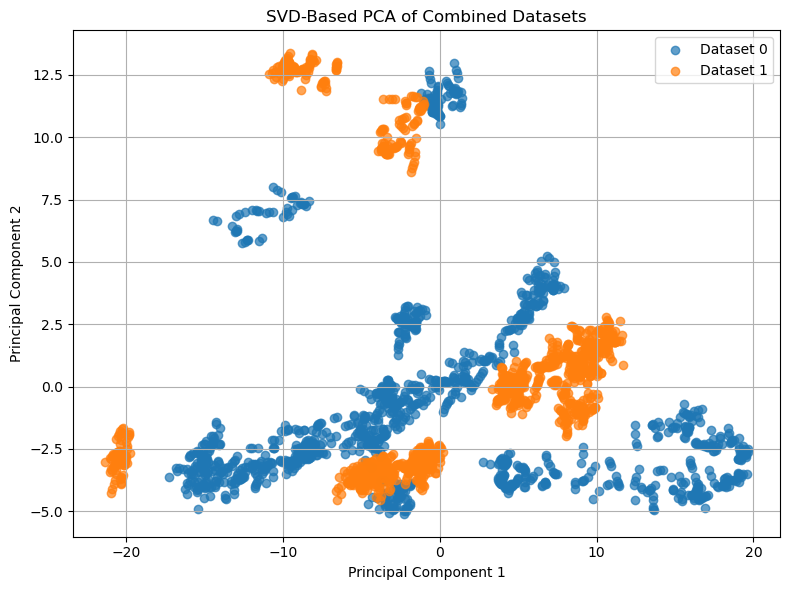

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Step 1: Combine the datasets
combined_data = np.vstack([dataset_0, dataset_1])

# Step 2: Center the combined data
mean_vector = np.mean(combined_data, axis=0)
combined_centered = combined_data - mean_vector

# Step 3: Perform SVD
U, S, Vt = svd(combined_centered, full_matrices=False)

# Step 4: Project onto principal components (scores)
principal_components = U @ np.diag(S)  # Equivalent to combined_centered @ Vt.T

# Step 5: Split the principal components back
n0 = len(dataset_0)
principal_components_0 = principal_components[:n0, :]
principal_components_1 = principal_components[n0:, :]

# Step 6: Keep only the first k components
k = 2
pc0 = principal_components_0[:, :k]
pc1 = principal_components_1[:, :k]

# Step 7: Make DataFrames for plotting
df0 = pd.DataFrame(pc0, columns=[f"PC{i+1}" for i in range(k)])
df1 = pd.DataFrame(pc1, columns=[f"PC{i+1}" for i in range(k)])

# Step 8: Plot
plt.figure(figsize=(8, 6))
plt.scatter(df0["PC1"], df0["PC2"], label="Dataset 0", alpha=0.7)
plt.scatter(df1["PC1"], df1["PC2"], label="Dataset 1", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVD-Based PCA of Combined Datasets")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# SVM Model Training and Results

In [85]:
# C_values = [1,2,3,4,8,50]
# gamma_values = [0.5,1,1.5,3,5]
# kernels = ['poly', 'rbf', 'sigmoid','linear']

# for i in kernels:

print(train_data.shape)
print(train_labels.shape)
# ori_model = svm.SVC(C=4, kernel='rbf', gamma=0.5)
model = svm.SVC(C=4, kernel = 'rbf', gamma=0.5)
start = time.time()

model.fit(train_abs_data,train_labels)
# model.fit(train,pca_train_label)


end = time.time()


# y_pred1 = model.predict(train_abs_data)
# y_pred2 = model.predict(valid_abs_data)
y_pred1 = model.predict(test_abs_data)
y_pred2 = model.predict(iso_abs_data)



# train_time = end-start
# test_time = end2-start2

print("-------------------------------------------------------------------------------")
# print("Train Time = ",train_time)
# print("Test Time = ", test_time)
print("-------------------------------------------------------------------------------")
# print("Train Accuracy:",metrics.accuracy_score(train_labels,y_pred1))
# print("Validation Accuracy:",metrics.accuracy_score(valid_labels,y_pred2))
print("Test Accuracy:",metrics.accuracy_score(test_labels,y_pred1))
print("Secondary Test Accuracy:",metrics.accuracy_score(iso_test_labels,y_pred2))


print("-------------------------------------------------------------------------------")
print("Visual Prediction")
print(y_pred2[:40])
print(" ")
print(iso_test_labels.head(40).values)


(2520, 600)
(2520,)
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Test Accuracy: 0.9976190476190476
Secondary Test Accuracy: 0.5357142857142857
-------------------------------------------------------------------------------
Visual Prediction
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0]
 
[1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1
 0 1 1]


In [86]:
print(y_pred2[-20:])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
